# **Capstone Project**

# Problem Statement 1:

A retail store that has multiple outlets across the country are facing issues in managing the
 inventory - to match the demand with respect to supply


  Dataset Information:
 The walmart.csv contains 6435 rows and 8 columns.


  1. You are provided with the weekly sales data for their various outlets. Use statistical
 analysis, EDA, outlier analysis, and handle the missing values to come up with various
 insights that can give them a clear perspective on the following:

 a. If the weekly sales are affected by the unemployment rate, if yes - which stores
 are suffering the most?

 b. If the weekly sales show a seasonal trend, when and what could be the reason?

 c. Does temperature affect the weekly sales in any manner?

 d. How is the Consumer Price index affecting the weekly sales of various stores?

 e. Top performing stores according to the historical data.

 f. The worst performing store, and how significant is the difference between the
 highest and lowest performing stores.


 2. Use predictive modeling techniques to forecast the sales for each store for the next 12
 weeks

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df = pd.read_csv('/content/Walmart DataSet.csv')

In [194]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [195]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# EDA (Exploratory Data Analysis)

In [197]:
df['Date'] = pd.to_datetime(df['Date'], format ='mixed')
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [198]:
# Statistics summary
df.describe()

Store                           Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                           6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 20:18:27.692307712  1.046965e+06      0.069930   
min       1.000000            2010-01-10 00:00:00  2.099862e+05      0.000000   
25%      12.000000            2010-10-12 00:00:00  5.533501e+05      0.000000   
50%      23.000000            2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000            2012-03-02 00:00:00  1.420159e+06      0.000000   
max      45.000000            2012-12-10 00:00:00  3.818686e+06      1.000000   
std      12.988182                            NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.663782     3.358607   171.578394      7.999151  
min      -2.060000     2.472000   126.064000      3.879000  
25%      47.460000     2.933000   131.735000      6.891000  
50%      62.670000     3.445000   182.616521      7.874000  
75%      74.940000     3.735000   212.743293      8.622000  
max     100.140000     4.468000   227.232807     14.313000  
std      18.444933     0.459020    39.356712      1.875885

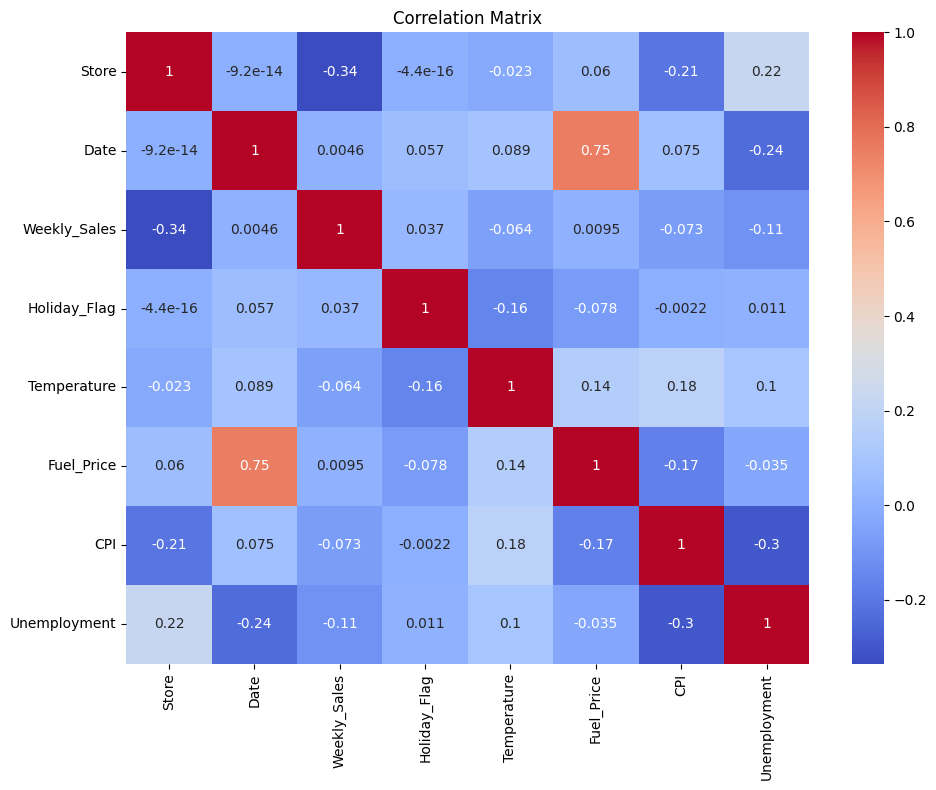

In [199]:
# heatmap for correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [200]:
# outliers
col = df.columns
col

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

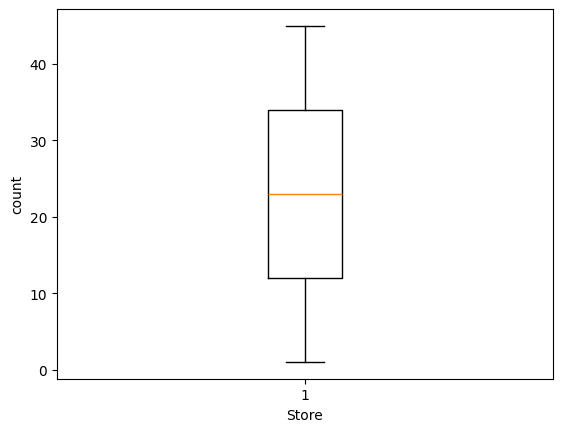

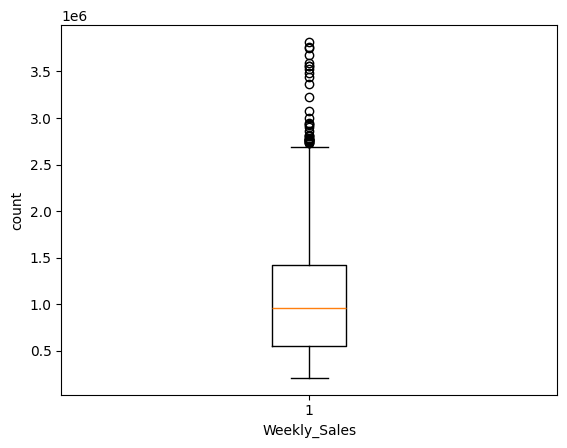

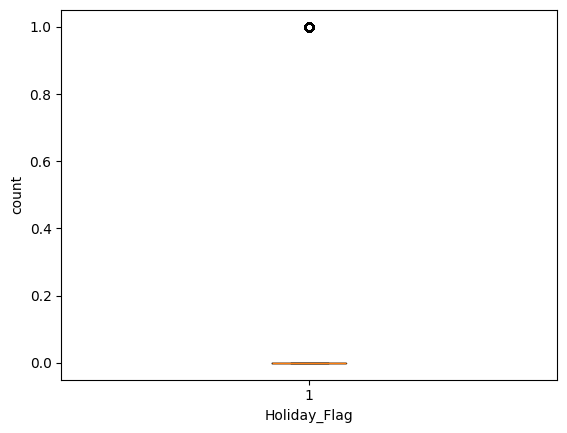

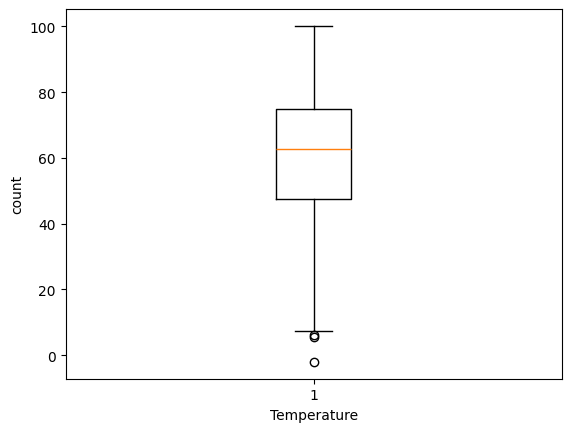

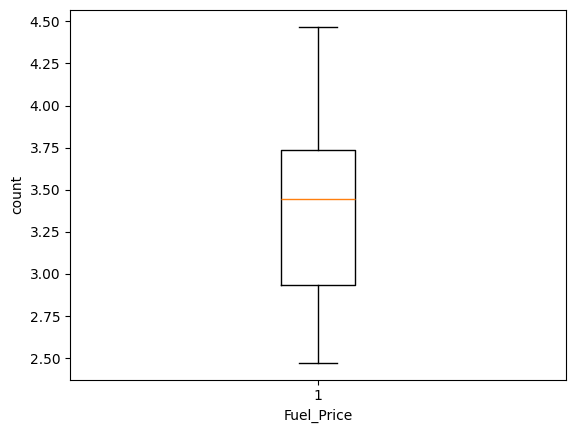

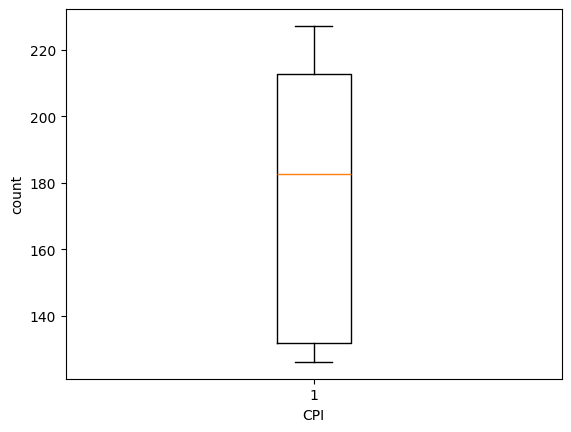

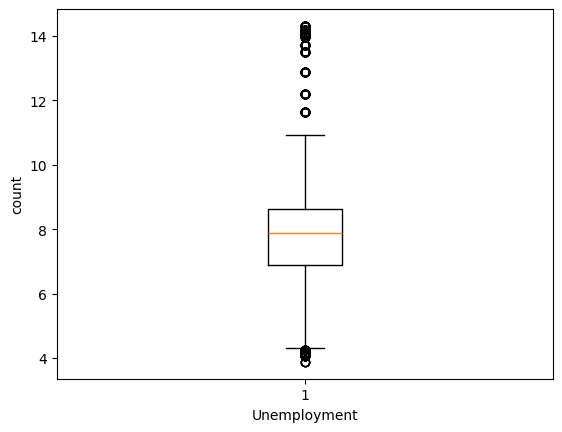

In [201]:
for i in col:
    if (df[i].dtypes!='object') and (df[i].dtypes!='datetime64[ns]'): # Check for datetime dtype
     plt.boxplot(df[i])
     plt.xlabel(i)
     plt.ylabel('count')
     plt.show()

In [202]:
# outliers columns
col1 = ['Weekly_Sales', 'Temperature', 'Unemployment']

In [203]:
# removing outliers
for i in col1:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    ll = Q1 - 1.5*IQR
    ul = Q3 + 1.5*IQR
    df = df[(df[i]<=ul)&(df[i]>=ll)]

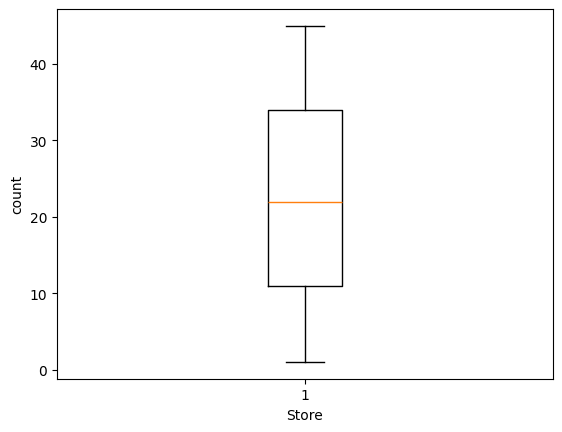

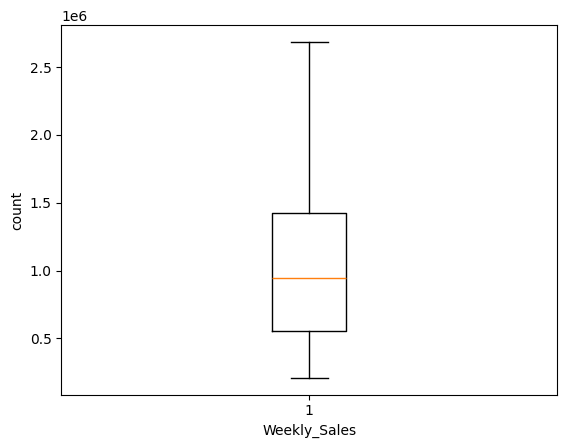

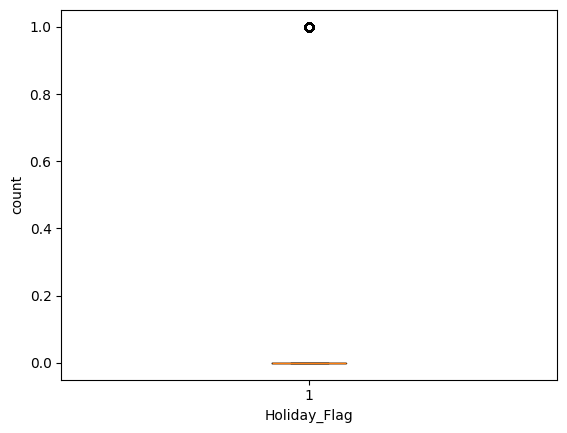

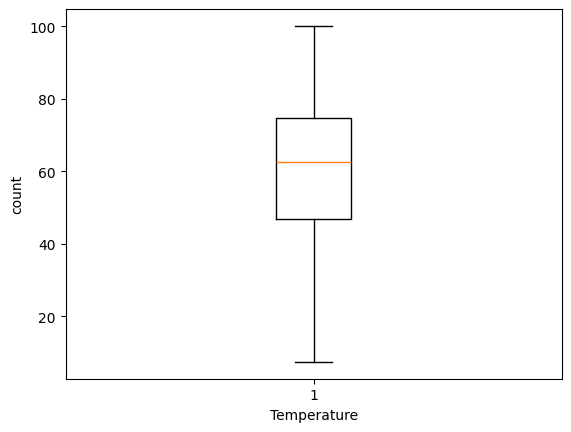

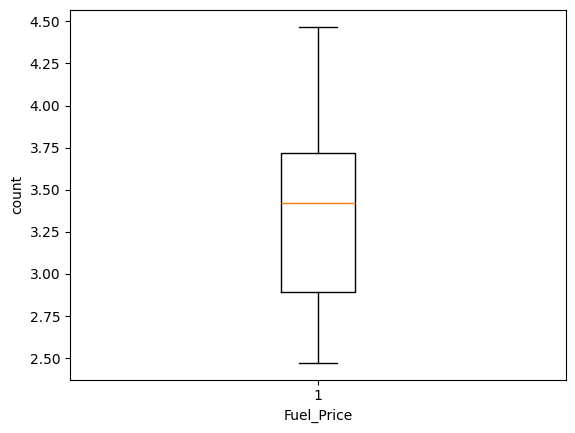

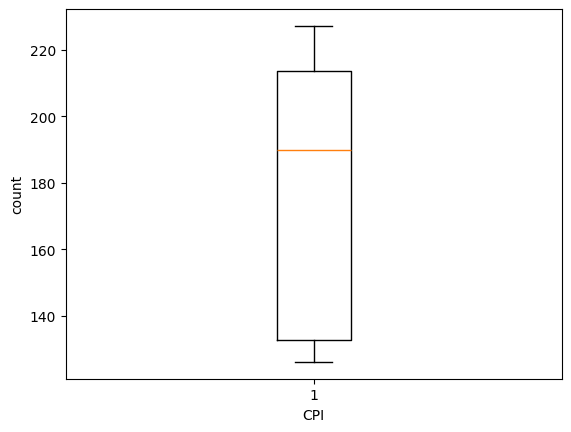

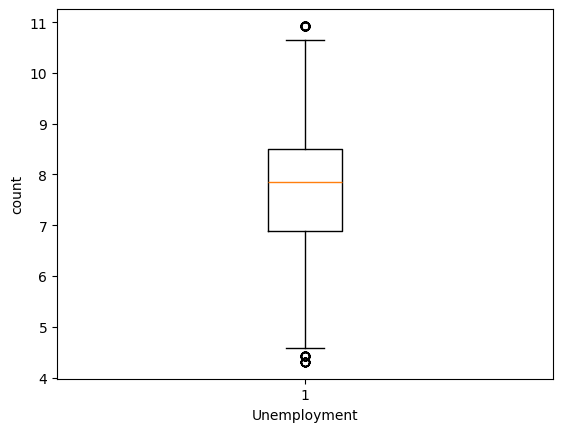

In [204]:
# chaecking outliers again
for i in col:
  if (df[i].dtypes!='object') and (df[i].dtypes!='datetime64[ns]'): # Check for datetime dtype
     plt.boxplot(df[i])
     plt.xlabel(i)
     plt.ylabel('count')
     plt.show()

In [205]:
# checkin missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [206]:
# thers is no missing value

#  a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [207]:
# we will use correlation here
correlation = df[['Unemployment', 'Weekly_Sales']].corr()

In [208]:
correlation

Unemployment  Weekly_Sales
Unemployment      1.000000     -0.073092
Weekly_Sales     -0.073092      1.000000

In [209]:
# which store mostly impacted
store_impacted = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2, -1]
store_impacted

Store              
1      Weekly_Sales   -0.097955
2      Weekly_Sales    0.054288
3      Weekly_Sales   -0.230413
4      Weekly_Sales   -0.633422
5      Weekly_Sales   -0.207043
6      Weekly_Sales    0.016833
7      Weekly_Sales   -0.165131
8      Weekly_Sales   -0.052580
9      Weekly_Sales   -0.191534
10     Weekly_Sales    0.186979
11     Weekly_Sales   -0.020339
12     Weekly_Sales    0.015141
13     Weekly_Sales   -0.400254
14     Weekly_Sales    0.269510
15     Weekly_Sales    0.078905
16     Weekly_Sales   -0.070864
17     Weekly_Sales   -0.279019
18     Weekly_Sales    0.139179
19     Weekly_Sales    0.101464
20     Weekly_Sales   -0.109391
21     Weekly_Sales    0.218367
22     Weekly_Sales    0.039043
23     Weekly_Sales   -0.231551
24     Weekly_Sales   -0.012261
25     Weekly_Sales   -0.004958
26     Weekly_Sales   -0.066556
27     Weekly_Sales   -0.002535
28     Weekly_Sales   -0.066340
29     Weekly_Sales    0.084682
30     Weekly_Sales    0.201862
31     Weekly_Sales   -0.064738
32     Weekly_Sales   -0.099455
33     Weekly_Sales    0.101175
34     Weekly_Sales    0.017010
35     Weekly_Sales    0.483865
36     Weekly_Sales    0.833734
37     Weekly_Sales   -0.221287
38     Weekly_Sales   -0.069747
39     Weekly_Sales   -0.384681
40     Weekly_Sales   -0.213724
41     Weekly_Sales   -0.350630
42     Weekly_Sales   -0.356355
43     Weekly_Sales   -0.201954
44     Weekly_Sales   -0.780076
45     Weekly_Sales   -0.004041
Name: Unemployment, dtype: float64

In [210]:
print(f"maximum impacted store :  {store_impacted.max()}")

maximum impacted store :  0.8337336178415088


In [211]:
# The store with the maximum impact
max_impacted_store = store_impacted.idxmax()[0]

# Print the result
print(f"The store most impacted by unemployment is Store {max_impacted_store} with a correlation of {store_impacted.max()}")

The store most impacted by unemployment is Store 36 with a correlation of 0.8337336178415088


#  b. If the weekly sales show a seasonal trend, when and what could be the reason?


<Figure size 640x480 with 0 Axes>

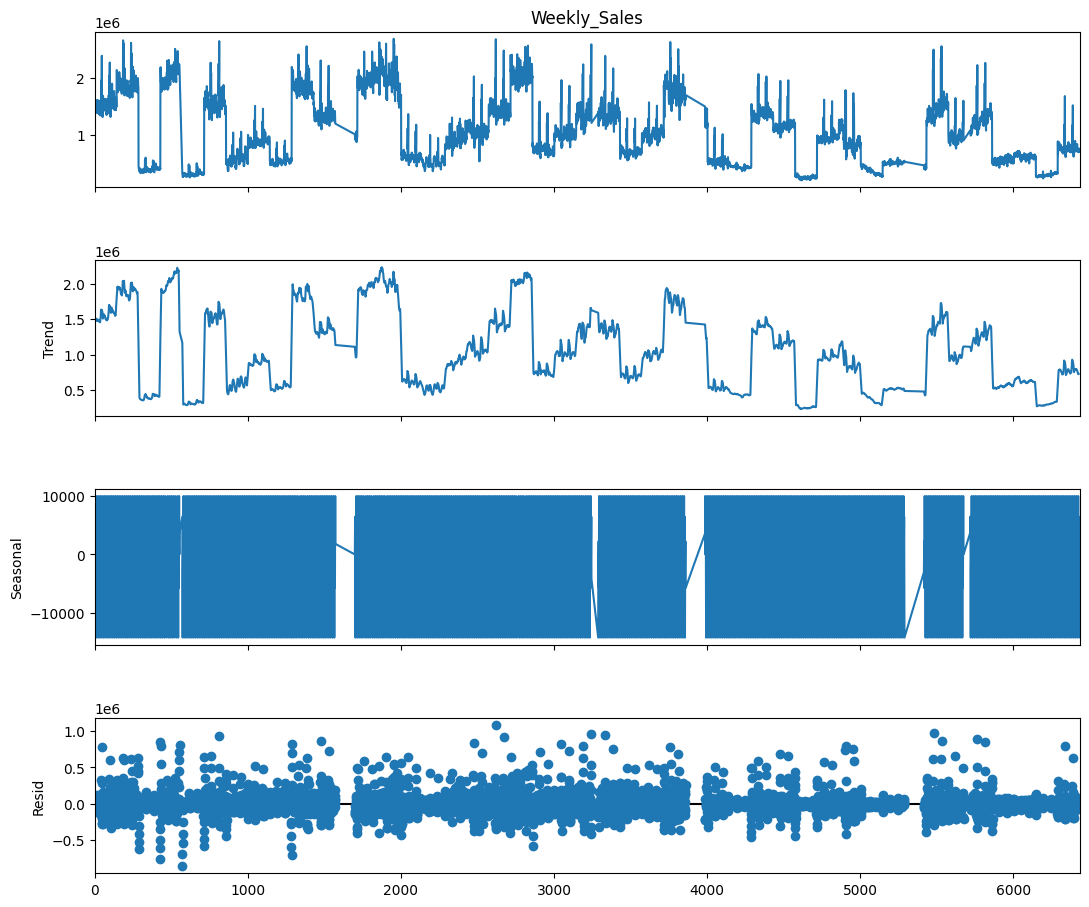

In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Weekly_Sales'],  period = 12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [213]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

In [214]:
monthly_sales

Month
1     9.560223e+05
2     1.059838e+06
3     1.028291e+06
4     1.031619e+06
5     1.040524e+06
6     1.068486e+06
7     1.011038e+06
8     1.043138e+06
9     1.009505e+06
10    1.027761e+06
11    1.101110e+06
12    1.114714e+06
Name: Weekly_Sales, dtype: float64

In [215]:
max_sale_month = monthly_sales.idxmax()
print(f"The month is {max_sale_month} with highest sale {monthly_sales.max()}")

The month is 12 with highest sale 1114714.3070319635


In [216]:
min_sale_month = monthly_sales.idxmin()
print(f"The month is {min_sale_month} with lowest sale {monthly_sales.min()}")

The month is 1 with lowest sale 956022.34026764


December is a holiday because of Christmas, so people buy their things to celebrate Christmas and in January people concentrate and go back to their work. That is why December is the highest sales month and January is the lowest sales month.



---

# c. Does temperature affect the weekly sales in any manner?


In [217]:
df[['Temperature', 'Weekly_Sales']].corr()

Temperature  Weekly_Sales
Temperature      1.000000     -0.041686
Weekly_Sales    -0.041686      1.000000

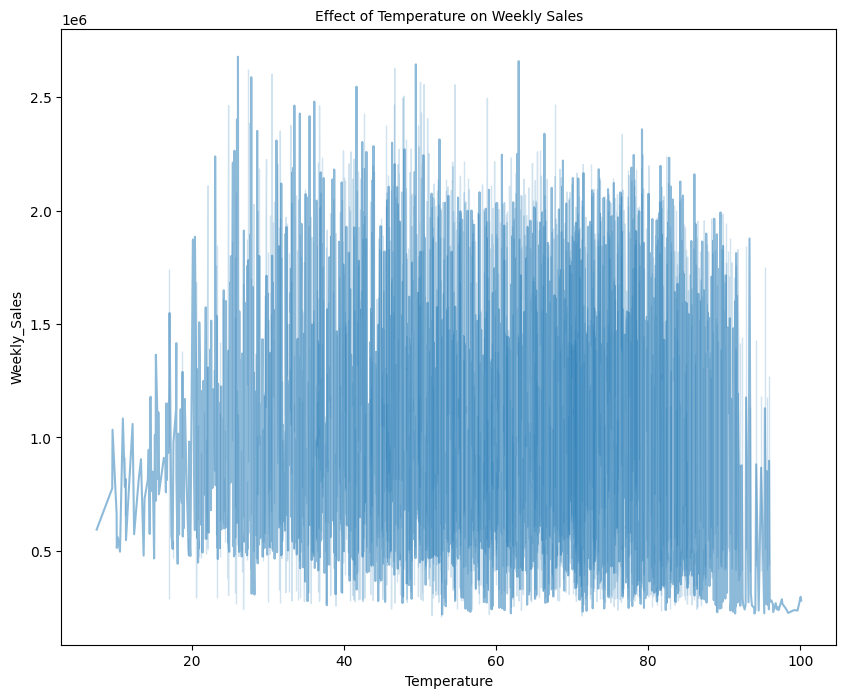

In [218]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Temperature',y='Weekly_Sales',data=df,alpha=0.5)
plt.xlabel('Temperature',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of Temperature on Weekly Sales',fontsize=10)
plt.show()

# very less impact of temperature on sales

# Temperature doesn't affect to the sale directly



---

# d. How is the Consumer Price index affecting the weekly sales of various stores?


In [219]:
df[['CPI', 'Weekly_Sales']].corr()

CPI  Weekly_Sales
CPI           1.000000     -0.082977
Weekly_Sales -0.082977      1.000000

When CPI increase, then sale also can decrease little bit. but not much effected



---

#  e. Top performing stores according to the historical data.


In [220]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head()
top_stores

Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
Name: Weekly_Sales, dtype: float64

# Store20, Store14, Store2, Store13 and Store 10 are top performing store

# And top_performing Store is Store20

#   f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [221]:
worst_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values().head(1)
worst_store

Store
38    7347378.89
Name: Weekly_Sales, dtype: float64

In [222]:
diff = top_stores.max() - worst_store.min()
diff
# difference between top and wrost performing Store's Sales is 272676355.92

272676355.92

# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [223]:
# Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks


# Modelling

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [225]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Month  
0  211.096358         8.106      5  
1  211.242170         8.106     12  
2  211.289143         8.106      2  
3  211.319643         8.106      2  
4  211.350143         8.106      5

In [226]:
# data splitting
x = df.drop('Weekly_Sales', axis = 1)
y = df['Weekly_Sales']

In [227]:
x

Store       Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1 2010-05-02             0        42.31       2.572  211.096358   
1         1 2010-12-02             1        38.51       2.548  211.242170   
2         1 2010-02-19             0        39.93       2.514  211.289143   
3         1 2010-02-26             0        46.63       2.561  211.319643   
4         1 2010-05-03             0        46.50       2.625  211.350143   
...     ...        ...           ...          ...         ...         ...   
6430     45 2012-09-28             0        64.88       3.997  192.013558   
6431     45 2012-05-10             0        64.89       3.985  192.170412   
6432     45 2012-12-10             0        54.47       4.000  192.327265   
6433     45 2012-10-19             0        56.47       3.969  192.330854   
6434     45 2012-10-26             0        58.85       3.882  192.308899   

      Unemployment  Month  
0            8.106      5  
1            8.106     12  
2            8.106      2  
3            8.106      2  
4            8.106      5  
...            ...    ...  
6430         8.684      9  
6431         8.667      5  
6432         8.667     12  
6433         8.667     10  
6434         8.667     10  

[5917 rows x 8 columns]

In [228]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 5917, dtype: float64

In [229]:
# Splitting Data into Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [230]:
x_train.shape

(4733, 8)

In [231]:
x_test.shape

(1184, 8)

In [232]:
y_train.shape

(4733,)

In [233]:
y_test.shape

(1184,)

 Linear Regression 

Train Accuracy Score: 0.12760592070082755
Test Accuracy Score: 0.13434772309894272
MSE :  257985678030.39758
MAE :  420617.08040961006
RMSE :  507922.9055972939


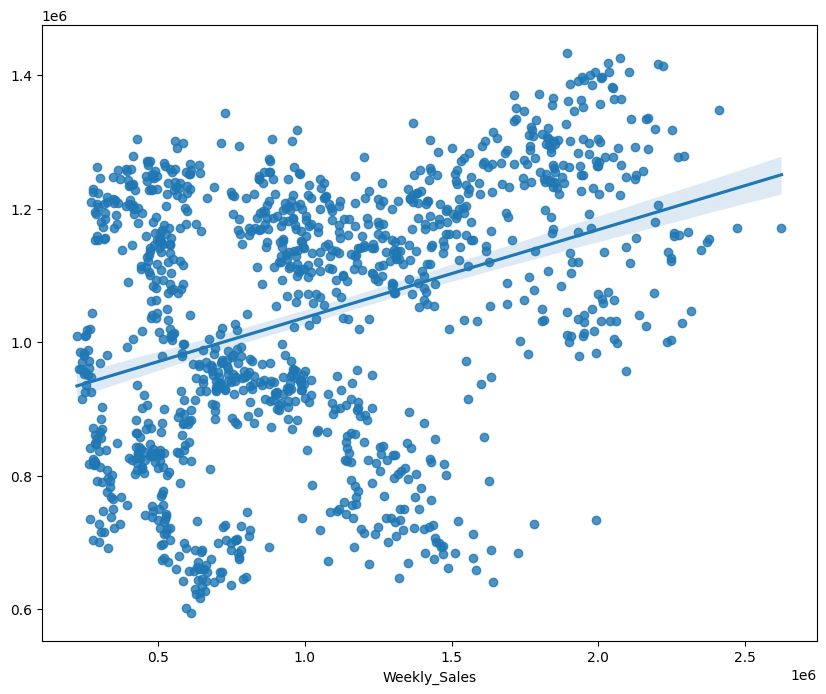

In [234]:

# Convert 'Date' to numerical features (e.g., ordinal)
x_train['Date_Ordinal'] = x_train['Date'].apply(lambda date: date.toordinal())
x_test['Date_Ordinal'] = x_test['Date'].apply(lambda date: date.toordinal())

# Drop the original 'Date' column
x_train = x_train.drop('Date', axis=1)
x_test = x_test.drop('Date', axis=1)

# Standardize the data (now without the 'Date' column)
# Extract numerical features for scaling
numerical_features = x_train.select_dtypes(include=['number']).columns

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the scaler on the training data (numerical features only)
x_train_scaled = x_train.copy()  # Create a copy of x_train to avoid modifying the original DataFrame
x_train_scaled[numerical_features] = scaler.fit_transform(x_train[numerical_features])

# Transform the test data (numerical features only)
x_test_scaled = x_test.copy()  # Create a copy of x_test to avoid modifying the original DataFrame
x_test_scaled[numerical_features] = scaler.transform(x_test[numerical_features])

# Linear Regression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr_pred = lr.predict(x_test_scaled)

print(" Linear Regression \n")

print('Train Accuracy Score:', lr.score(x_train_scaled, y_train))
print('Test Accuracy Score:', r2_score(y_test, lr_pred))

print('MSE : ', metrics.mean_squared_error(y_test, lr_pred))
print('MAE : ', metrics.mean_absolute_error(y_test, lr_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=lr_pred)  # Use y_test for the x-axis
plt.show()

 Random Forest Classifier
Train Accuracy Score: 0.9928087432380617
Test Accuracy Score: 0.9467176028845705
MSE: 15879465362.37221
MAE: 73676.92313935807
RMSE: 126013.7506876619


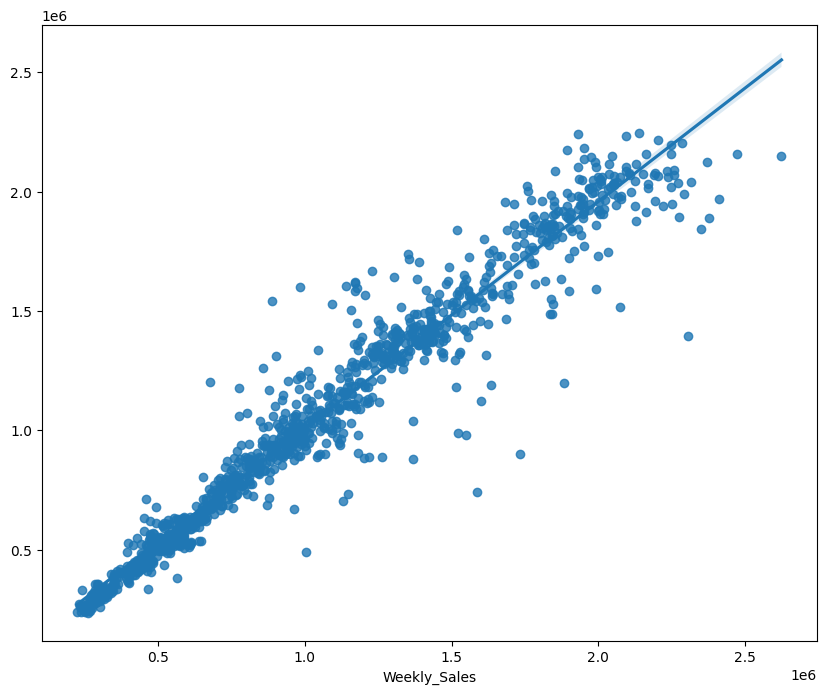

In [235]:
# Random Forest

rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)
rf_pred = rf.predict(x_test_scaled)

print(" Random Forest Classifier")

print('Train Accuracy Score:', rf.score(x_train_scaled, y_train))
print('Test Accuracy Score:', r2_score(y_test, rf_pred))

print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=rf_pred)
plt.show()

 Decision Tree Classifier 
Train Accuracy Score : 1.0
Test Accuracy Score: 0.9091232463057457
MSE: 27083508638.068703
MAE: 93391.71474662163
RMSE: 164570.6797642542


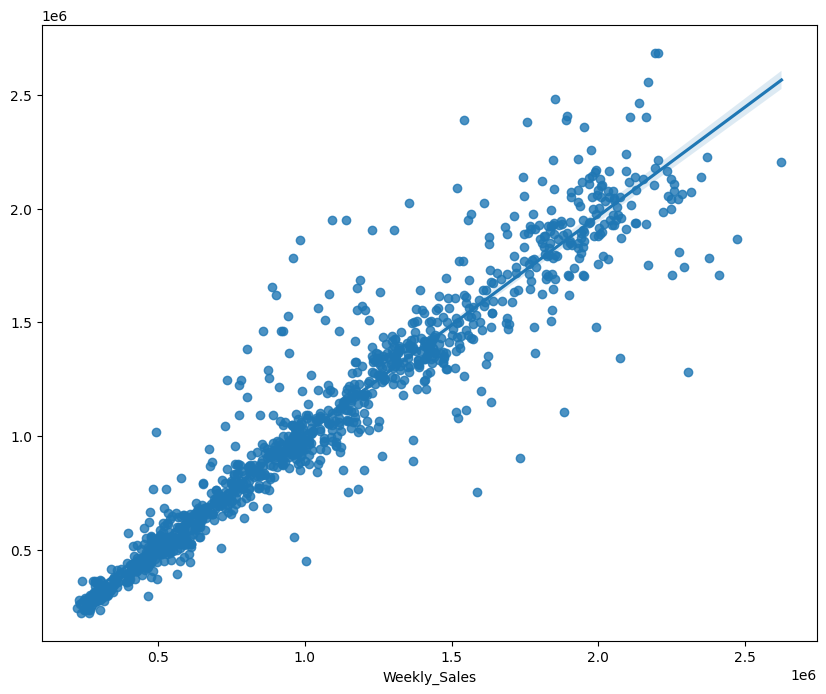

In [236]:
# Decision Tree

dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)
dt_pred = dt.predict(x_test_scaled)

print(" Decision Tree Classifier ")

print('Train Accuracy Score :', dt.score(x_train_scaled, y_train))
print('Test Accuracy Score:', r2_score(y_test, dt_pred))

print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('MAE:', mean_absolute_error(y_test, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))

plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=dt_pred)
plt.show()

* KNearest Neighbors Regressor*

Train Accuracy Score: 0.6582598911553462
Test Accuracy Score: 0.47481415453112774
MSE: 156518304232.15182
MAE: 283431.78246790543
RMSE: 395623.9429460151


<Axes: xlabel='Weekly_Sales'>

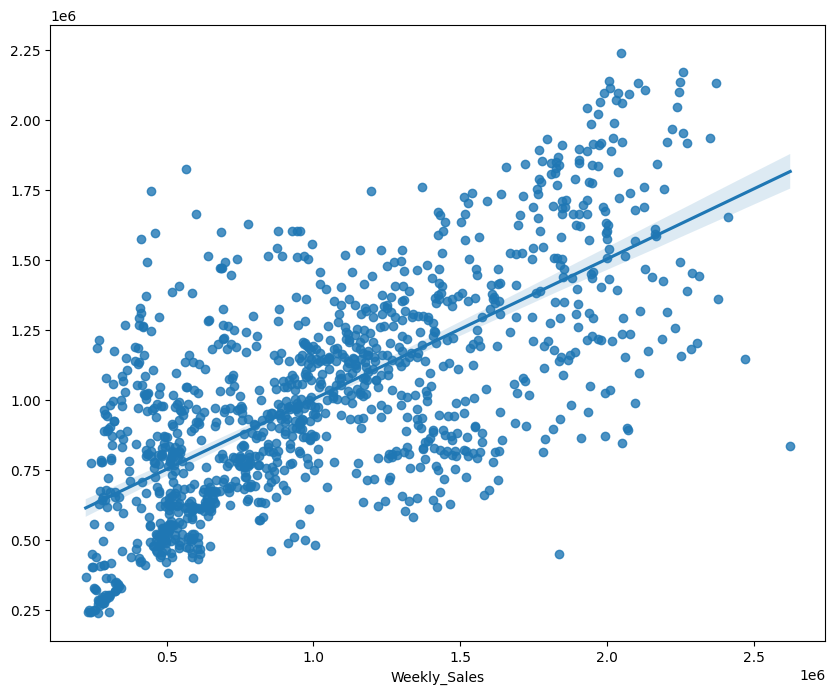

In [237]:
#KNearest Neighbors


knn=KNeighborsRegressor()
knn.fit(x_train_scaled,y_train)
knn_pred=knn.predict(x_test_scaled)

print('* KNearest Neighbors Regressor*\n')

print('Train Accuracy Score:', knn.score(x_train_scaled,y_train))
print('Test Accuracy Score:', r2_score(y_test,knn_pred))

print('MSE:',metrics.mean_squared_error(y_test,knn_pred))
print('MAE:',metrics.mean_absolute_error(y_test,knn_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,knn_pred)))

plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=knn_pred)

In [238]:
# Cross Validation...

# Linear Regression CV:

lr_scores=cross_val_score(lr,x_train_scaled,y_train,cv=10,scoring='r2')
print(lr_scores)
print('LinearRegression_Mean Score:',lr_scores.mean())


# Random Forest CV:

rf_scores=cross_val_score(rf,x_train_scaled,y_train,cv=10,scoring='r2')
print(rf_scores)
print('RandomForest_Mean Score:',rf_scores.mean())


# Decision Tree CV:

dt_scores=cross_val_score(dt,x_train_scaled,y_train,cv=10,scoring='r2')
print(dt_scores)
print('Decison_Mean Score:',dt_scores.mean())



# Knearest Neighbors CV:

knn_scores=cross_val_score(knn,x_train_scaled,y_train,cv=10,scoring='r2')
print(knn_scores)
print('Knn_Mean Score:',knn_scores.mean())

[0.13716308 0.11539668 0.10855153 0.14759606 0.16835884 0.1380797
 0.07051282 0.10960185 0.09522685 0.12646782]
LinearRegression_Mean Score: 0.12169552505097044
[0.95223203 0.95960552 0.93681335 0.94874061 0.95775088 0.9493753
 0.95020239 0.92001571 0.95039045 0.94521425]
RandomForest_Mean Score: 0.9470340493741419
[0.90404011 0.93088152 0.90888563 0.89850203 0.91504005 0.93130064
 0.92167568 0.88227519 0.9233566  0.90246356]
Decison_Mean Score: 0.9118421004656462
[0.42869467 0.40912823 0.40970775 0.51581008 0.43859365 0.49248813
 0.38910881 0.4596251  0.45754538 0.43116456]
Knn_Mean Score: 0.4431866358611833


In [239]:
# Combines Score display...

print('LinearReg_Train Accuracy Score:', lr.score(x_train_scaled,y_train))
print('LinearRef_Test Accuracy Score:', r2_score(y_test,lr_pred))
print('LinearRegression_Mean Score:',lr_scores.mean())

print('************\n')

print('RandomForest_Train Accuracy Score:', rf.score(x_train_scaled,y_train))
print('RandomForest_Test Accuracy Score:', r2_score(y_test,rf_pred))
print('RandomForest_Mean Score:',rf_scores.mean())

print('************\n')
print('DecisonTree_Train Accuracy Score:', dt.score(x_train_scaled,y_train))
print('DecisionTree_Test Accuracy Score:', r2_score(y_test,dt_pred))
print('Decison_Mean Score:',dt_scores.mean())



print('************\n')
print('knn_Train Accuracy Score:', knn.score(x_train_scaled,y_train))
print('Knn_Test Accuracy Score:', r2_score(y_test,knn_pred))
print('Knn_Mean Score:',knn_scores.mean())

LinearReg_Train Accuracy Score: 0.12760592070082755
LinearRef_Test Accuracy Score: 0.13434772309894272
LinearRegression_Mean Score: 0.12169552505097044
************

RandomForest_Train Accuracy Score: 0.9928087432380617
RandomForest_Test Accuracy Score: 0.9467176028845705
RandomForest_Mean Score: 0.9470340493741419
************

DecisonTree_Train Accuracy Score: 1.0
DecisionTree_Test Accuracy Score: 0.9091232463057457
Decison_Mean Score: 0.9118421004656462
************

knn_Train Accuracy Score: 0.6582598911553462
Knn_Test Accuracy Score: 0.47481415453112774
Knn_Mean Score: 0.4431866358611833


## As per above score RandomForest model is giving the higest score of in which Train Accuracy Score: 99% and Test Accuracy Score: 94.79% which is better than other models...



---

## Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [240]:
#For forcasting we are using the Prophet Library...

!pip install prophet

In [241]:
from prophet import Prophet

In [242]:
import os
os

<module 'os' (frozen)>

In [243]:
dt=pd.read_csv('Walmart DataSet.csv',parse_dates=['Date'])

In [244]:
dt.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [245]:
Max_Sale=dt['Weekly_Sales'].max()
Max_Sale

3818686.45

In [246]:
Min_Sale=dt['Weekly_Sales'].min()
Min_Sale

209986.25

In [247]:
total_sale=dt.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [248]:
total_sale

Date  Weekly_Sales
0    01-04-2011   43458991.19
1    01-06-2012   48281649.72
2    01-07-2011   47578519.50
3    01-10-2010   42239875.87
4    02-03-2012   46861034.97
..          ...           ...
138  30-07-2010   44630363.42
139  30-09-2011   42195830.81
140  30-12-2011   46042461.04
141  31-08-2012   47159639.43
142  31-12-2010   40432519.00

[143 rows x 2 columns]

In [249]:
#In prohpet we need to give only 2 columns for forcasting..
total_sale.columns=['ds','y']

In [250]:
total_sale

ds            y
0    01-04-2011  43458991.19
1    01-06-2012  48281649.72
2    01-07-2011  47578519.50
3    01-10-2010  42239875.87
4    02-03-2012  46861034.97
..          ...          ...
138  30-07-2010  44630363.42
139  30-09-2011  42195830.81
140  30-12-2011  46042461.04
141  31-08-2012  47159639.43
142  31-12-2010  40432519.00

[143 rows x 2 columns]

In [251]:
total_sale['ds']=pd.to_datetime(total_sale['ds'],errors='coerce')

In [252]:
total_sale=total_sale.dropna()

In [253]:
model=Prophet(interval_width=0.95) #Level of confidendce
model.fit(total_sale)
future=model.make_future_dataframe(periods=12)
future.tail(12)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpooegkhy1/8rtay4z4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpooegkhy1/2drahhwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88526', 'data', 'file=/tmp/tmpooegkhy1/8rtay4z4.json', 'init=/tmp/tmpooegkhy1/2drahhwq.json', 'output', 'file=/tmp/tmpooegkhy1/prophet_model_pn1bs5q/prophet_model-20250428100434.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:04:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:04:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds
57 2012-12-11
58 2012-12-12
59 2012-12-13
60 2012-12-14
61 2012-12-15
62 2012-12-16
63 2012-12-17
64 2012-12-18
65 2012-12-19
66 2012-12-20
67 2012-12-21
68 2012-12-22

In [254]:
forcast=model.predict(future)
forcast.tail(12)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
64 2012-12-18  4.571674e+07  4.232223e+07  4.986484e+07
65 2012-12-19  4.283579e+07  3.908019e+07  4.644826e+07
66 2012-12-20  4.511277e+07  4.166614e+07  4.869661e+07
67 2012-12-21  4.472002e+07  4.105448e+07  4.824669e+07
68 2012-12-22  4.533780e+07  4.155734e+07  4.896905e+07

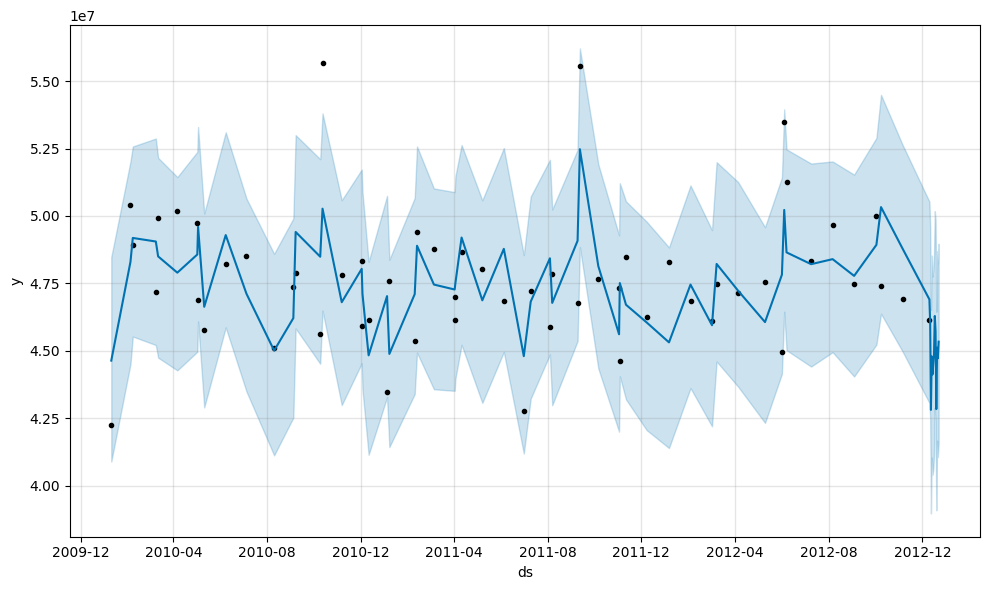

In [255]:
total_sale_plot=model.plot(forcast)

In [256]:
## The above graph is showing the future predicted values for 12 weeks

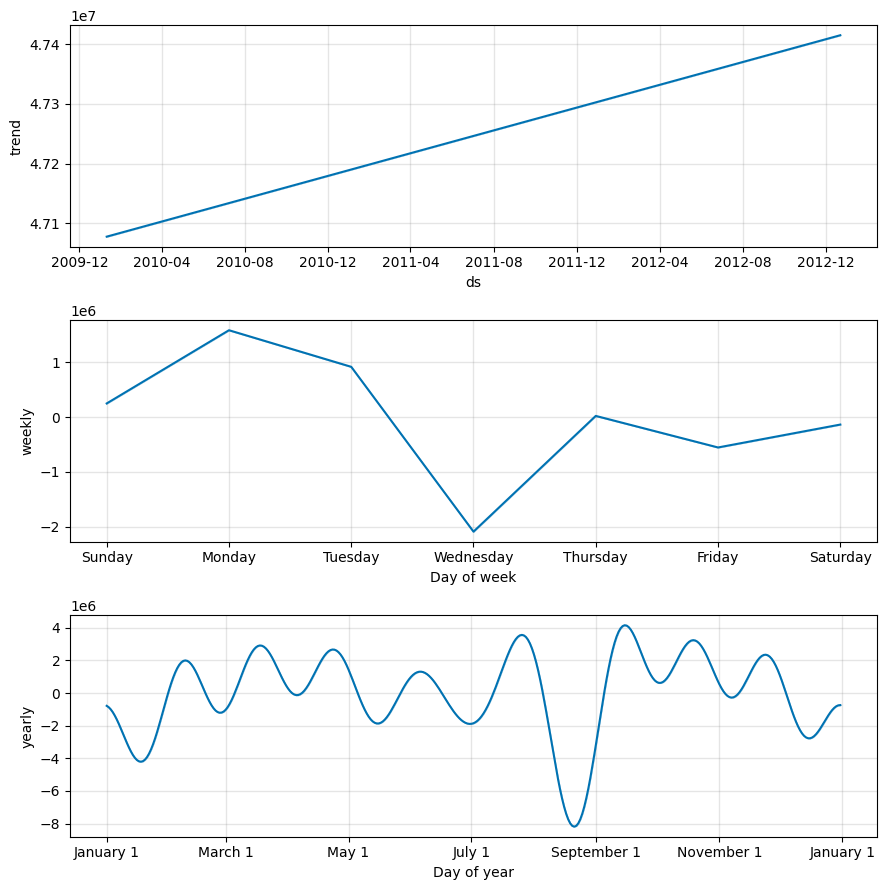

In [257]:
total_sale_forcast_plot1=model.plot_components(forcast)

In [258]:
# as per above grphs we can find that sale is drop in Jan and it's maintain consistently high from mid of Feb and goes till novemenr mid and again at end of november sales will go up as due to public holidays... on Yearly basis...

# We will use SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with eXogenous regressors) Model for prediction for 1 store

In [259]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [260]:
# df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
# df.set_index('Date', inplace = True)

In [261]:
# store1 = df[df['Store'] == 1]

In [262]:
# x1 = store1['Weekly_Sales']  #Target Variable
# y1 = store1[['CPI', 'Unemployment', 'Temperature']]

In [263]:
# # Build SARIMAX Model

# model = SARIMAX(x1,
#                 y1 = y1,
#                 order = (1,1,1), #ARIAM PArameters (p, d, q) use 1 as a average
#                 seasonal_order=(1,1,1,52),
#                 enforce_stationarity=False,
#                 enforce_invertibility=False)


# model_fit = model.fit(disp=False)

In [264]:
# # prediction for next 12 years

# next_y1 = y1.tail(12)
# predict = model_fit.predict(steps = 12, y1 = next_y1)

In [265]:
# plt.figure(figsize=(12, 6))
# plt.plot(x1[-50], label = 'previous sales')
# plt.plot(predict, label = 'predicted sales')
# plt.title('Sales 1 - prediction for 12 months')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

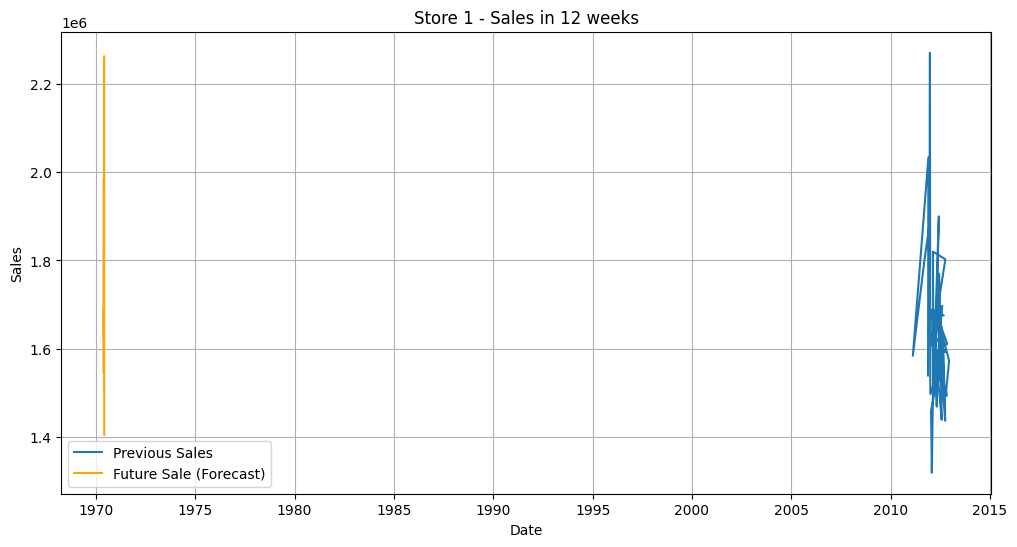

In [266]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)


store1_data = df[df['Store'] == 1]


y = store1_data['Weekly_Sales']   # Target Variable
exog = store1_data[['CPI', 'Unemployment', 'Temperature']]  #  (Exogenous Variables)

#  SARIMAX
model = SARIMAX(y,
                exog=exog,
                order=(1,1,1),       # ARIMA parameters (p,d,q)
                seasonal_order=(1,1,1,52),  # Seasonality (P,D,Q,s)
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)


future_exog = exog.tail(12)
forecast = model_fit.forecast(steps=12, exog=future_exog)

# 5. visualize
plt.figure(figsize=(12,6))
plt.plot(y[-50:], label='Previous Sales')
plt.plot(forecast, label='Future Sale (Forecast)', color='orange')
plt.title('Store 1 - Sales in 12 weeks')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#prediction for all store

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. prepare dataset
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

Store 1 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

Store 2 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 3 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 4 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 5 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 6 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 7 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 8 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 9 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 10 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 11 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 12 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 13 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 14 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 15 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 16 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 17 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 18 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 19 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 20 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 21 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 22 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 23 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 24 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 25 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 26 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 27 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 28 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 29 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 30 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 31 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 32 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 33 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 34 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 35 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 36 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 37 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 38 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Store 39 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

Store 40 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 41 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 42 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 43 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 44 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Store 45 working...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


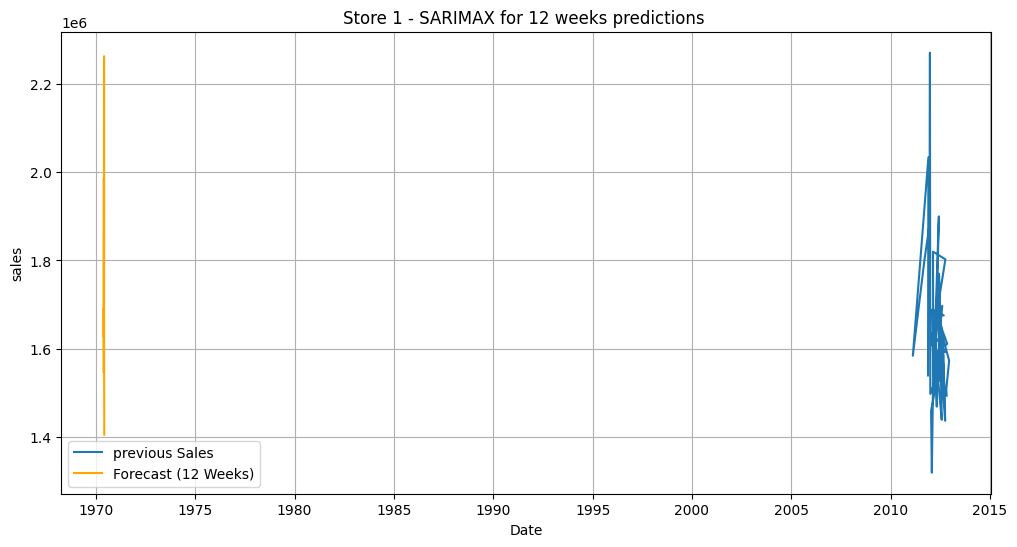

In [267]:


# take list of all unit sales
stores = df['Store'].unique()

# 2. use SARIMAX for each store
forecast_all_stores = {}

for store in stores:
    print(f"Store {store} working...")


    store_data = df[df['Store'] == store]


    y = store_data['Weekly_Sales']
    exog = store_data[['CPI', 'Unemployment', 'Temperature']]


    try:
        model = SARIMAX(y,
                        exog=exog,
                        order=(1,1,1),
                        seasonal_order=(1,1,1,52),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

        model_fit = model.fit(disp=False)

        future_exog = exog.tail(12)

        forecast = model_fit.forecast(steps=12, exog=future_exog)

        forecast_all_stores[store] = forecast

    except Exception as e:
        print(f"Store {store} : {e}")

sample_store = 1
plt.figure(figsize=(12,6))
plt.plot(df[df['Store'] == sample_store]['Weekly_Sales'][-50:], label='previous Sales')
plt.plot(forecast_all_stores[sample_store], label='Forecast (12 Weeks)', color='orange')
plt.title(f'Store {sample_store} - SARIMAX for 12 weeks predictions ')
plt.xlabel('Date')
plt.ylabel('sales')
plt.legend()
plt.grid(True)
plt.show()
